In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!pip install filterpy

Defaulting to user installation because normal site-packages is not writeable


In [3]:
from filterpy.kalman import KalmanFilter
f = KalmanFilter (
    dim_x=2, # analizujemy predkosc i polozenie wiec 2 wymiary 
             # (jezeli predkosc i polozenie w w wymiarach to 4)
    dim_z=1 # liczba mierzonych wymiarow
) 

In [4]:
f.x = np.array([[2.],    # initial position
                [0.]])   # initial velocity

In [5]:
f.F = np.array([[1.,1.],
                [0.,1.]])

In [6]:
f.H = np.array([[1.,0.]]) # ktory wymiar jest mierzony?

In [7]:
f.R = 7 # szum podczas mierzenia wartosci

In [8]:
# Covariance matrix - (How do the two dimentions relate?)

# I think this is saying ze sa niezalezne
f.P = np.array([[1000.,    0.],
                [   0., 1000.] ])

In [9]:
from filterpy.common import Q_discrete_white_noise
f.Q = Q_discrete_white_noise(dim=2, dt=0.1, var=0.13)

In [10]:
sim_len = 75

results = []
likelihood = []
deltas = []
s = 0
v = 10
a = 10
for t in range(sim_len):
    s += v
#     s = (a*t**2) / 2
    likelihood.append(f.log_likelihood_of(s)) 
    f.predict()
    deltas.append(f.x[0] - s)
    f.update(s)
    results.append(f.x)
len(results[:][0])

2

In [11]:
len([i for i in range(sim_len)])

75

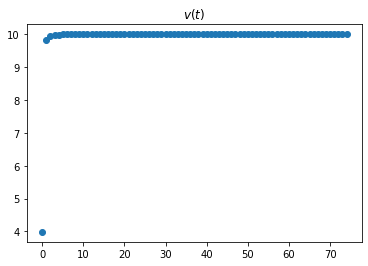

In [12]:
plt.title("$v(t)$")
plt.scatter([i for i in range(sim_len)],[speed[1] for speed in results])

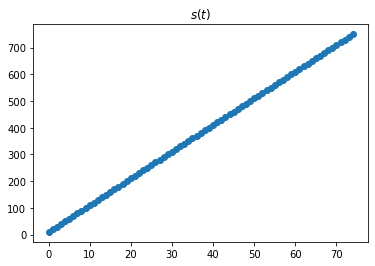

In [13]:
plt.title("$s(t)$")
plt.scatter([i for i in range(sim_len)],[speed[0] for speed in results])

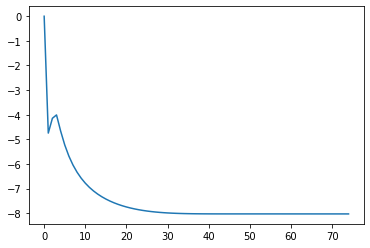

In [14]:
from math import exp

plt.plot(likelihood)

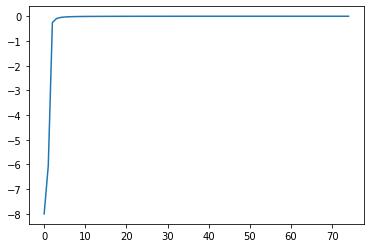

In [15]:
# plt.yscale('log')
plt.plot(deltas)

In [16]:
from filterpy.kalman import KalmanFilter

kf = KalmanFilter(
    dim_x=4,  # analizujemy predkosc i polozenie wiec 2 wymiary 
    # (jezeli predkosc i polozenie w w wymiarach to 4)
    dim_z=2  # liczba mierzonych wymiarow
)

kf.x = np.array([
    [0.],  # initial x position
    [0.],  # initial x speed
    [0.],  # initial y position
    [0.]  # initial x speed
])

f.P = np.diag([[100., 100., 100., 100.]])
f.R = [2, 2]  # szum podczas mierzenia wartosci

dt = 1 
kf.F = np.array([
    [1., dt, 0., 0.],
    [0., 1., 0., 0.],
    [0., 0., 1., dt],
    [0., 0., 0., 1.],
])

kf.H = np.array([[1., 0., 0., 0.], [0., 0., 1.,
                                    0.]])  # ktory wymiar jest mierzony?

# M_TO_FT = 1 / 2

# kf.F = np.array([[1, 0, dt, 0], [0, 1, 0, dt], [0, 0, 1, 0], [0, 0, 0,
#                                                                    1]])

# kf.H = np.array([[M_TO_FT, 0, 0, 0], [0, M_TO_FT, 0, 0]])

from filterpy.common import Q_discrete_white_noise

kf.Q = Q_discrete_white_noise(dim=4, dt=dt, var=0.13)


In [17]:
def f(x):
    vx = 10.
    vy = 2.
    return np.array([[vx*x], [vy*x]]), np.array([[vx*x],[vx], [vy*x],[vy],]) 

sim_len = 150

results = []
likelihood = []
deltas = []

for t in range(sim_len):
    p, exp = f(t)
    likelihood.append(kf.log_likelihood_of(p))
    kf.predict()
    kf.update(p)
    results.append(kf.x)
    deltas.append(exp-kf.x)

# kalman(sim_len)

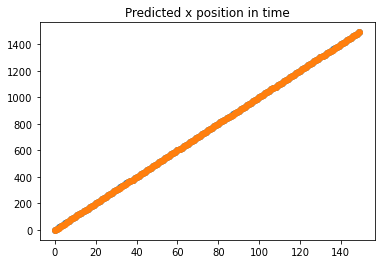

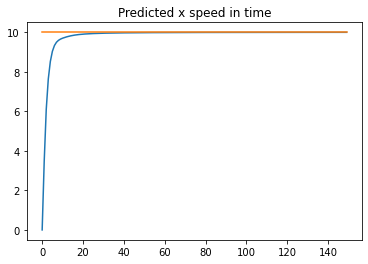

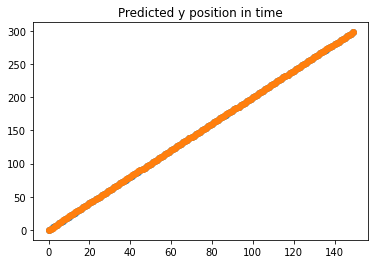

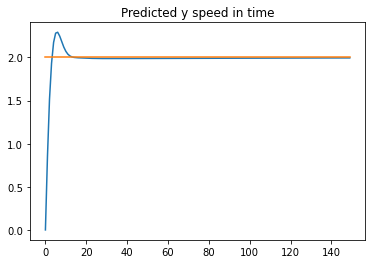

In [18]:
# %matplotlib

plt.title("Predicted x position in time")
plt.scatter([t for t in range(sim_len)], [f(t)[0][0] for t in range(sim_len)])
plt.scatter([t for t in range(sim_len)], [p[0] for p in results])
plt.show()
plt.title("Predicted x speed in time")
plt.plot([p[1] for p in results])
plt.plot([10 for p in results])
plt.show()

plt.title("Predicted y position in time")
plt.scatter([t for t in range(sim_len)], [f(t)[0][1] for t in range(sim_len)])
plt.scatter([t for t in range(sim_len)], [p[2] for p in results])
plt.show()
plt.title("Predicted y speed in time")
plt.plot([p[3] for p in results])
plt.plot([2 for p in results])
plt.show()


# %matplotlib

# 

# %matplotlib inline

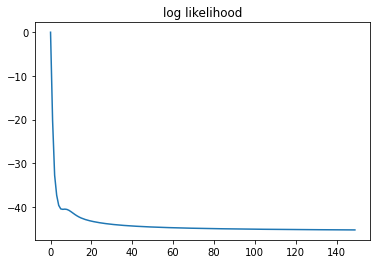

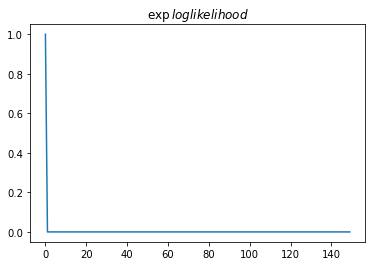

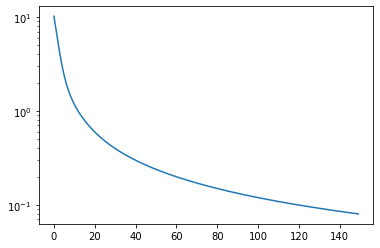

In [19]:
plt.title("log likelihood")
plt.plot(likelihood)
plt.show()
plt.title("$\exp{log likelihood}$")
plt.plot(np.exp(likelihood))
plt.show()
plt.yscale('log')
plt.plot([np.linalg.norm(x) for x in deltas])
plt.show()


<IPython.core.display.Javascript object>


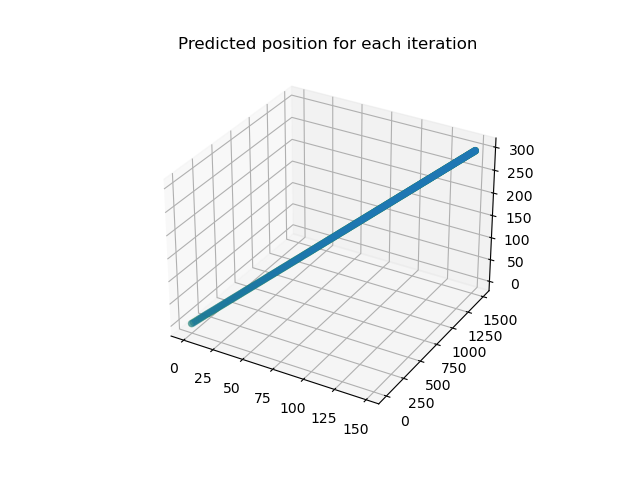

In [20]:
%matplotlib notebook

ax = plt.axes(projection="3d")

# Creating plot
# ax.scatter3D(x, y, z, color="green")

plt.title("Predicted position for each iteration")
# plt.xlabel('$x$')
# plt.ylabel('$y$')
# plt.zlabel('$t$')

ax.scatter3D( [t for t in range(sim_len)],
            [f(t)[0][0] for t in range(sim_len)],
            [f(t)[0][1] for t in range(sim_len)],
             color="green")

ax.scatter3D([t for t in range(sim_len)],
             [p[0] for p in results], 
             [p[2] for p in results],
             )
plt.show()